In [56]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:

import os
import cv2
import numpy as np

def load_images_from_directory(directory):
    images = []
    labels = []
    class_folders = sorted(os.listdir(directory))
    for class_label, class_folder in enumerate(class_folders):
        class_path = os.path.join(directory, class_folder)
        for filename in os.listdir(class_path):
            if filename.endswith(('.jpg', '.jpeg', '.png')):  # Adjust the file extensions as needed
                image_path = os.path.join(class_path, filename)
                image = cv2.imread(image_path)
                image = cv2.resize(image, (32, 32))  # Resize images to 32x32 pixels
                images.append(image)
                labels.append(class_label)

    return np.array(images), np.array(labels)

# Define paths to your training and testing directories
train_directory = './train'
test_directory = './test'

# Load and preprocess the training dataset
train_x_orig, train_y = load_images_from_directory(train_directory)

# Load and preprocess the testing dataset
test_x_orig, test_y = load_images_from_directory(test_directory)

# Reshape and normalize the image data
train_x = train_x_orig.reshape(train_x_orig.shape[0], -1).T / 255.
test_x = test_x_orig.reshape(test_x_orig.shape[0], -1).T / 255.
train_y = train_y.reshape(1, -1)
test_y = test_y.reshape(1, -1)
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# # Create an ImageDataGenerator for normalization
# datagen = ImageDataGenerator(rescale=1./255)

# # Assuming 'image_data' is your image data (replace it with your actual variable)
# # Reshape the image data to have a batch dimension
# image_data = np.expand_dims(train_x, axis=0)

# # Use the ImageDataGenerator to normalize
# train_x = datagen.standardize(image_data)
# image_data = np.expand_dims(test_x, axis=0)

# # Use the ImageDataGenerator to normalize
# test_x = datagen.standardize(image_data)
# # Print shapes of the datasets
print("train_x's shape:", train_x.shape)
print("train_y's shape:", train_y.shape)
print("test_x's shape:", test_x.shape)
print("test_y's shape:", test_y.shape)

train_x's shape: (3072, 10500)
train_y's shape: (1, 10500)
test_x's shape: (3072, 2250)
test_y's shape: (1, 2250)


In [58]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 3072     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x,n_h, n_y)

In [59]:
import numpy as np

def initialize_parameters_deep(layer_dims, initialization_method="random"):
    global parameters
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    initialization_method -- string specifying the initialization method: "random", "he", or "xavier"

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2":
    """
    
    np.random.seed(1)
    parameters = {}
    (n_x, n_h, n_y) = layer_dims
    
    if initialization_method == "random":
        parameters["W1"] = np.random.randn(layer_dims[1], layer_dims[0]) / np.sqrt(layer_dims[0])
        parameters["W2"] = np.random.randn(layer_dims[2], layer_dims[1]) / np.sqrt(layer_dims[1])
    elif initialization_method == "he":
        parameters["W1"] = np.random.randn(layer_dims[1], layer_dims[0]) * np.sqrt(2 / layer_dims[0])
        parameters["W2"] = np.random.randn(layer_dims[2], layer_dims[1]) * np.sqrt(2 / layer_dims[1])
    elif initialization_method == "xavier":
        parameters["W1"] = np.random.randn(layer_dims[1], layer_dims[0]) * np.sqrt(1 / layer_dims[0])
        parameters["W2"] = np.random.randn(layer_dims[2], layer_dims[1]) * np.sqrt(1 / layer_dims[1])
    else:
        raise ValueError("Invalid initialization method. Choose from 'random', 'he', or 'xavier'")
    
    parameters["b1"] = np.zeros((layer_dims[1], 1))
    parameters["b2"] = np.zeros((layer_dims[2], 1))
    
    return parameters


In [60]:
def Sigmoid(Z):
    return 1/(1+np.exp(-Z))

def Relu(Z):
    return np.maximum(0,Z)

def dRelu2(dZ, Z):    
    dZ[Z <= 0] = 0    
    return dZ

def dRelu(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def dSigmoid(Z):
    b = 1/(1+np.exp(-Z))
    dZ = b * (1-b)
    return dZ


In [61]:
def linear_activation_forward(X,parameters):
    global ch
    global cost
    
    Z1 = (np.dot(parameters['W1'], X))+ parameters['b1'] 
    A1 = Relu(Z1)
    ch['Z1'],ch['A1']=Z1,A1
        
    Z2 = parameters['W2'].dot(A1) + parameters['b2']
    A2 = Sigmoid(Z2)
    ch['Z2'],ch['A2']=Z2,A2

    AL=A2
    cost=A2
    return AL

    """
    Implement the forward propagation

    Arguments:
    X -- input data:
    parameters -- python dictionary containing your parameters "W1", "b1","W2", "b2":

    Returns:
    AL -- output of the forward propogation
    """
    
    


In [62]:
def compute_cost( Y,sam,AL):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cost
     print(Y.shape[1])
    print(AL.T.shape[1])
    print(np.log(AL).T.shape[1])
    print(np.log(1-AL).T.shape[1])
    rint(AL)
    """
   
    AL = np.squeeze(np.asarray(AL))
    

    cost = (1./sam) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))    
   # print(cost.shape[0])    



    return cost

In [63]:
def linear_activation_backward(X,Y,AL,ch):
    global parameters         
    """
    Implement the backward propagation
    
    Arguments:
    X -- input data
    cost -- cost
    
    Returns:
    grads --  A dictionary with the gradients
             grads["dW1"]
             grads["db1"]
             grads["dW2"]
             grads["db2"]
    """
    # print("\n",AL.shape[1])


    dcost_AL = - (np.divide(Y, AL ) - np.divide(1 - Y, 1 - AL))    
        
    dcost_Z2 =  np.multiply(dcost_AL,dSigmoid(ch["Z2"]))
   # print(dcost_Z2.T.shape[0])
   # print(parameters["W2"].shape[0])
    dcost_A1 =  np.dot(parameters["W2"].T,dcost_Z2)
    dcost_W2 = 1./ch['A1'].shape[1] * np.dot(dcost_Z2,ch['A1'].T)
    dcost_b2 = 1./ch['A1'].shape[1] * np.dot(dcost_Z2, np.ones([dcost_Z2.shape[1],1])) 
                            
    dcost_Z1 = dcost_A1 * dRelu(ch['Z1'])        
    dcost_A1 = np.dot(parameters["W1"].T,dcost_Z1)
    dcost_W1 = 1./X.shape[1] * np.dot(dcost_Z1,X.T)
    dcost_b1 = 1./X.shape[1] * np.dot(dcost_Z1, np.ones([dcost_Z1.shape[1],1]))  
    grads={}
    grads["W1"] = dcost_W1
    grads["b1"] = dcost_b1
    grads["W2"] = dcost_W2
    grads["b2"] = dcost_b2
    
    return grads


In [64]:

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
             parameters["W1"]
             parameters["b1"]
             parameters["W2"]
             parameters["b2"]
    """
    parameters["W1"]=parameters["W1"]-learning_rate*grads["W1"]
    parameters["b1"]=parameters["b1"]-learning_rate*grads["b1"]
    parameters["W2"]=parameters["W2"]-learning_rate*grads["W2"]
    parameters["b2"]=parameters["b2"]-learning_rate*grads["b2"]
    return parameters


In [65]:
def predict(test_x, test_y, parameters,threshold):

    """
    Predict test data
    test_x -- test data
    test_y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)
    
    Returns:
    accuracy -- accuracy of your model
    
    """
    predictions = np.zeros((1,test_x.shape[1]))
    pred=linear_activation_forward(test_x, parameters)
    
    for i in range(0, pred.shape[1]):
        predictions[0,i] = (pred[0,i] > threshold)
    
    accuracy = np.sum((predictions == test_y)/test_x.shape[1])*100
    return predictions, accuracy


In [66]:
def plot_cost(cost,learning_rate):
    np.random.seed(1)
    
        

    plt.plot(np.squeeze(cost))
    plt.ylabel('cost')
    plt.xlabel('Iter')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
 


In [67]:
def two_layer_model(X, Y, layers_dims, learning_rate , num_iterations) :
    global costList
    global ch
    global permanentAL
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costList = []                             # to keep track of the cost
    ch={}
    m = X.shape[1]                           # number of examples
    
    AL=np.zeros((1,Y.shape[1])) 
    sam =Y.shape[1]
    threshold=0.5

    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters_deep(layers_dims,'he')
    ### END CODE HERE ###

    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ###
        AL=linear_activation_forward(X,parameters)
        
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### 
        costcomputed = compute_cost(Y,sam,AL)
        
        
        
        
        
        
    
        ### END CODE HERE ###
        
        
        # Backward propagation.
        ### START CODE HERE ### 
        grads = linear_activation_backward(X,Y,AL,ch)
        ### END CODE HERE ###

        
        # Update parameters.
        ### START CODE HERE ### 
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
        
        # Print the cost every 100 training example
        if i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(costcomputed)))
        if i % 100== 0:
            costList.append(costcomputed)

    return parameters, costList,AL,ch

In [70]:
#def main():



"""Main function
You need to combine all functions in the main function"""
learning_rate = 0.00000000027   
num_iterations = 100
x,y=train_x, train_y

parameters,cost,AL,dict= two_layer_model(train_x, train_y, layers_dims, learning_rate, num_iterations)
#plot_cost(cost,learning_rate,num_iterations,x,y,AL,ch)
train_predictions,train_accuracy=predict(train_x,train_y,parameters,0.2)
print("train accuracy : ",train_accuracy)
test_predictions, test_accuracy = predict(test_x, test_y, parameters, 0.2)
print("Test Accuracy: " + str(test_accuracy))

#main()

Cost after iteration 0: 5.222932692835304
train accuracy :  6.752380952380954
Test Accuracy: 6.622222222222223


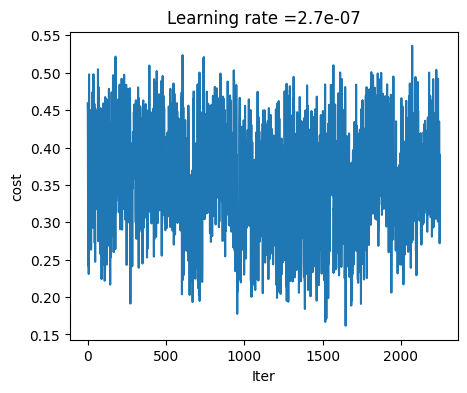

In [69]:
plot_cost(cost,learning_rate)



